In [2]:
import numpy as np

In [1]:
a=5
b=10
a+b

15

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
def f(a):
    return 3*a**2-4*a+5

In [21]:
x=np.arange(-5,5,0.25)
y=f(x)
f(y)
h=0.0001


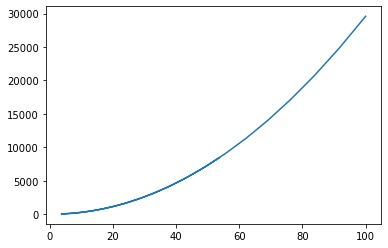

In [22]:
plt.plot(f(x),f(y))

In [26]:
a=5
b=-3
c=10
t=a*b+c
h=0.0001
c+=h
t2=a*b+c
print((t2-t)/h)

0.9999999999976694


In [52]:
class Value:
    def __init__(self,data,_childern=(),_op=''):
        self.data=data
        self._prev=set(_childern)
        self._op=_op
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self,other):
        return Value(self.data+other.data,(self,other),'+')
    def __sub__(self,other):
        return Value(self.data-other.data,(self,other),'-')
    def __mul__(self,other):
        return Value(self.data*other.data,(self,other),'*')
  

In [53]:
a=Value(2.0)

In [54]:
a

Value(data=2.0)

In [55]:
b=Value(3.0)
a+b

Value(data=5.0)

In [56]:
print(a-b)
print(a*b)



Value(data=-1.0)
Value(data=6.0)


In [57]:
c=Value(5.0)
d=a*b+c


In [58]:
d._prev

{Value(data=5.0), Value(data=6.0)}

In [59]:
d._op

'+'

In [60]:
d

Value(data=11.0)